In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from spectres import spectres

In [10]:
wide = pd.read_csv("../data/2018-01-04_Euclid_tips_spectra_wide_matched.csv")

In [114]:
df_training = fits.open("/Users/brunomor/src/ISAP_V3.1/idl/COSMO/Galaxies/Darth_Fader/df_data/training.fits.gz")

In [115]:
df_training.info()

Filename: /Users/brunomor/src/ISAP_V3.1/idl/COSMO/Galaxies/Darth_Fader/df_data/training.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (3884, 277)   float64   
  1              ImageHDU         6   (277,)   float64   
  2              ImageHDU         6   (277,)   int32   


In [109]:
# Create errorcurve FITS file
new_hdulist = fits.HDUList()
new_hdulist.append(fits.ImageHDU())
new_hdulist[0].data = df_training[0].data

In [110]:
new_hdulist.info()

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   (2142,)   float64   


In [112]:
new_hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 2142                                                  

In [113]:
new_hdulist[0].data

array([  7.55753492,   4.32995401,   4.30397644, ...,   5.71466673,
         5.87069022,  21.87352074])

# Checking Oct 2016 runs

## 1) Basic data - what did I use as input?

In [145]:
ls /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/base_data/

2016-06-20_all_filters_corrected_spectra_spec_10_rebin_5A_all_z1to1p8_randomset.fits@
2016-06-20_spec_10_list_truez_corr_z1to1p8_randomset.npy@
2016-09-08_Dedale_spectroscopic_templates_euclid_run.npy


In [127]:
hdulist = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/base_data/2016-06-20_all_filters_corrected_spectra_spec_10_rebin_5A_all_z1to1p8_randomset.fits")

In [128]:
hdulist.info()

Filename: /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/base_data/2016-06-20_all_filters_corrected_spectra_spec_10_rebin_5A_all_z1to1p8_randomset.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (3441, 1001)   float64   


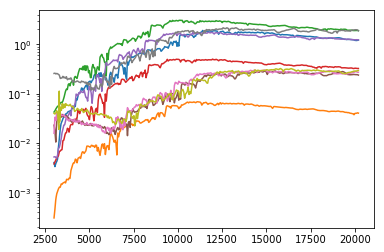

In [136]:
for i in range(1, 10):
    plt.plot(hdulist[0].data[0], hdulist[0].data[i])
plt.yscale("log")

In [138]:
data_np = np.load("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/base_data/2016-09-08_Dedale_spectroscopic_templates_euclid_run.npy")

In [158]:
data_np.shape

(3751, 10296)

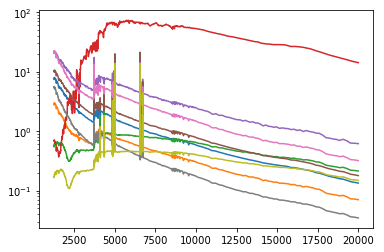

In [144]:
for i in range(1, 10):
    plt.plot(data_np[:, 0], data_np[:, i])
plt.yscale("log")

## 2) Formatted data - how did I prepare Darth Fader data?

In [146]:
ls /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/

errorcurve_constant.fits.gz    training_euclid.fits.gz
redshifts_gen1.fits            training_euclid_small.fits.gz
testing_euclid.fits.gz         ztrue_saclay.fits.gz


In [152]:
hdulist_testing = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/testing_euclid.fits.gz")
hdulist_testing.info()

Filename: /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/testing_euclid.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (9360, 1000)   float64   


In [153]:
hdulist_training = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/training_euclid.fits.gz")
hdulist_training.info()

Filename: /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/training_euclid.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (13852, 10295)   float64   


In [154]:
hdulist_training_small = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/training_euclid_small.fits.gz")
hdulist_training_small.info()

Filename: /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/training_euclid_small.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (13852, 300)   float64   


In [156]:
hdulist_ztrue_saclay = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/ztrue_saclay.fits.gz")
hdulist_ztrue_saclay.info()

Filename: /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/ztrue_saclay.fits.gz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       5   (1000,)   float64   


In [157]:
hdulist_redshift_gen = fits.open("/Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/redshifts_gen1.fits")
hdulist_redshift_gen.info()

Filename: /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/formatted_data/redshifts_gen1.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   (1000,)   float64   


In [148]:
%%bash
cat ls /Users/brunomor/Work/Dedale/analysis/DF_runs/Saclay_reference_run/df_input_params_Saclay_reference_run.pro

;+
; NAME:
;        df_input_params.pro
;
; PURPOSE:
;    Specifies the inputs for the Darth Fader pipeline
;
; INPUTS: 
;   *INDIR - directory containing the input test spectra, training set
;           and/or eigentemplates
;   *incat - name of FITS file containing test spectra
;   *trainingcat - name of FITS file containing training set to compute
;                 eigentemplates. If you have already computed these,
;                 set trainingcat=''
;   *rmscurve - the name of the FITS file containing your RMS error
;               curve(s) associated with the test spectra. For white
;               gaussian noise, set rmscurve = ''
;   *templatecat - name of FITS file containing eigentemplates. Set
;                  templatecat='' if you wish Darth Fader to compute
;                  these from a training set. NOTE: Either templatecat
;                  or trainingcat MUST be specified.
;
;   *lstep - logarithmic pixel scaling. Note: Spectra must be LOG-BINNED. 
;   *(optional)

cat: ls: No such file or directory
